# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import the model
import inauguralproject as model
hsm = model.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [9]:
# code for solving the model (remember documentation and comments)

dsol = hsm.solve_discrete()

print(f'LM = {dsol.LM:.3f}, LF = {dsol.LF:.3f}, HM = {dsol.HM:.3f}, HF <= {dsol.HF:.3f} for alpha and sigma: {hsm.par.alpha, hsm.par.sigma}') 

/Users/victoremillundgaard/Documents/Introduction to programming/projects-2023-rvcode/inauguralproject/inauguralproject.py:65: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


LM = 4.500, LF = 4.500, HM = 4.500, HF <= 4.500 for alpha and sigma: (0.5, 1.0)


We start our project by adjusting the code. First the parameter H is defined correctly in the py file. Thereafter we continue by defining the descrete function of the hours working in the market and at home. 

Create lists of $\alpha$ and $\sigma$ values and 

In [12]:
alpha_list = [0.25, 0.50, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# Create an empty data frame
hprel = pd.DataFrame(columns=['alpha', 'sigma', 'HF/HM'])

# Now we iterate over different values of alpha and sigma
for alpha in alpha_list:
    for sigma in sigma_list:
        hsm.par.alpha = alpha
        hsm.par.sigma = sigma
        dsol = hsm.solve_discrete()
        HF_HM=dsol.HF/dsol.HM
        row = {"alpha": alpha, "sigma": sigma, "HF/HM": HF_HM}
        hprel = pd.concat([hprel, pd.DataFrame([row])], ignore_index=True)
    

# print the results 
print(hprel)

/Users/victoremillundgaard/Documents/Introduction to programming/projects-2023-rvcode/inauguralproject/inauguralproject.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma-1)/par.sigma)
/Users/victoremillundgaard/Documents/Introduction to programming/projects-2023-rvcode/inauguralproject/inauguralproject.py:61: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma-1)/par.sigma)
/Users/victoremillundgaard/Documents/Introduction to programming/projects-2023-rvcode/inauguralproject/inauguralproject.py:65: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)
/Users/victoremillundgaard/Documents/Introduction to programming/projects-2023-rvcode/inauguralproject/inauguralproject.py:65: RuntimeWarning: invalid value en

   alpha  sigma     HF/HM
0   0.25    0.5  0.545455
1   0.25    1.0  0.307692
2   0.25    1.5  0.333333
3   0.50    0.5  1.000000
4   0.50    1.0  1.000000
5   0.50    1.5  1.000000
6   0.75    0.5  1.833333
7   0.75    1.0  3.250000
8   0.75    1.5  3.000000


/Users/victoremillundgaard/Documents/Introduction to programming/projects-2023-rvcode/inauguralproject/inauguralproject.py:65: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


# Question 2

Explain your code and procedure

/Users/victoremillundgaard/Documents/Introduction to programming/projects-2023-rvcode/inauguralproject/inauguralproject.py:65: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)
/Users/victoremillundgaard/Documents/Introduction to programming/projects-2023-rvcode/inauguralproject/inauguralproject.py:65: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)
/Users/victoremillundgaard/Documents/Introduction to programming/projects-2023-rvcode/inauguralproject/inauguralproject.py:65: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)
/Users/victoremillundgaard/Documents/Introduction to programming/projects-2023-rvcode/inauguralproject/inauguralproject.py:65: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)
/Users/victoremillundgaard/Documents/Introduction to pro

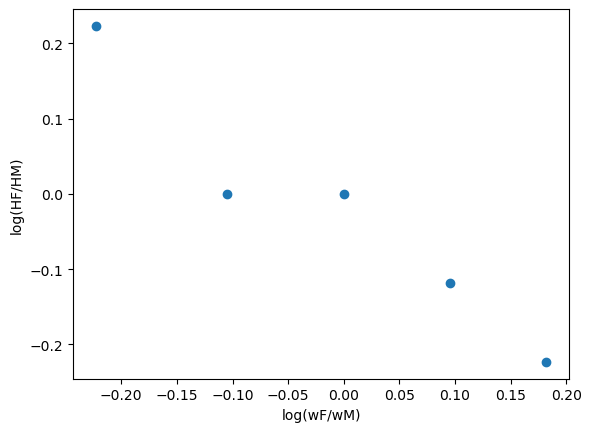

In [30]:
# Create a list of wF
wF_list = [0.8, 0.9, 1.0, 1.1, 1.2]
# Create an empty data frame
hfhm = pd.DataFrame(columns=['wF', 'HF/HM'])

# Create a loop similar to question 1 but only for one value
for wF in wF_list:
    hsm.par.wF = wF
    dsol = hsm.solve_discrete()
    HF_HM = dsol.HF/dsol.HM
    row = {"wF": wF, "HF/HM": HF_HM}
    hfhm = pd.concat([hfhm, pd.DataFrame([row])], ignore_index=True)

# Plot the resulst
plt.plot(np.log(hfhm['wF']/hsm.par.wM), np.log(hfhm['HF/HM']),'o')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.show()

# Question 3

Explain your code and procedure

[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]
[1.24998234 1.11109225 1.         0.9097014  0.83353877]


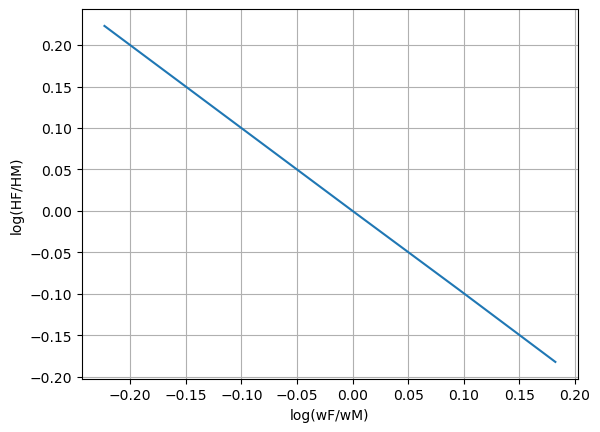

In [59]:
Home_ratio = hsm.solve_wF_vec(discrete = False)

log_w_rat = np.log(hsm.par.wF_vec / hsm.par.wM)

print(log_w_rat)
print(Home_ratio)


# Plot the resulst
plt.plot(log_w_rat, np.log(Home_ratio))
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.grid(True)
plt.show()


In [49]:
print(dsol)

None


ADD CONCISE CONLUSION.